In [1]:
import dionysus as d

In [5]:
f = d.Filtration([[0], [1], [0,1], [2], [0,2], [1,2]])
times = [[.4, .6, .7], [.1], [.9], [.9], [.9], [.9]]

In [6]:
zz, dgms, cells = d.zigzag_homology_persistence(f, times)

## cycles still alive in the right-most homology group in the sequence

In [8]:
print(zz)

Zigzag persistence with 2 alive cycles


In [13]:
for z in zz:
    print(' + '.join("%d * (%s)" % (x.element, f[cells[x.index]]) for x in z))

1 * (<1> 0)
1 * (<0,1> 0) + 1 * (<0,2> 0) + 1 * (<1,2> 0)


## persistence diagrams that represent the decomposition of the sequence

In [18]:
print(dgms)

[Diagram with 3 points, Diagram with 1 points]


In [9]:
for i,dgm in enumerate(dgms):
    print("Dimension:", i)
    for p in dgm:
        print(p)

Dimension: 0
(0.4,0.6)
(0.7,0.9)
(0.1,inf)
Dimension: 1
(0.9,inf)


## auxiliary map to translate from internal indices used in the cycles into the indices of the simplices in the Filtration

In [19]:
print(cells)

In [12]:
for x in sorted(cells):
    print(x)

(0, 1)
(2, 0)
(3, 3)
(4, 2)
(5, 4)
(6, 5)


In [20]:
def detail(i,t,d,zz,cells):
    print(i,t,d)
    for z in zz:
        print(z, ' -> ', ' + '.join("%d * (%s)" % (x.element, f[cells[x.index]]) for x in z))

zz, dgms, cells = d.zigzag_homology_persistence(f, times, callback = detail)

1 0.10000000149011612 True
1*0  ->  1 * (<1> 0)
0 0.4000000059604645 True
1*0  ->  1 * (<1> 0)
1*1  ->  1 * (<0> 0)
0 0.6000000238418579 False
1*0  ->  1 * (<1> 0)
0 0.699999988079071 True
1*0  ->  1 * (<1> 0)
1*2  ->  1 * (<0> 0)
3 0.8999999761581421 True
1*0  ->  1 * (<1> 0)
1*2  ->  1 * (<0> 0)
1*3  ->  1 * (<2> 0)
2 0.8999999761581421 True
1*0  ->  1 * (<1> 0)
1*3  ->  1 * (<2> 0)
4 0.8999999761581421 True
1*0  ->  1 * (<1> 0)
5 0.8999999761581421 True
1*0  ->  1 * (<1> 0)
1*4 + 1*5 + 1*6  ->  1 * (<0,1> 0) + 1 * (<0,2> 0) + 1 * (<1,2> 0)


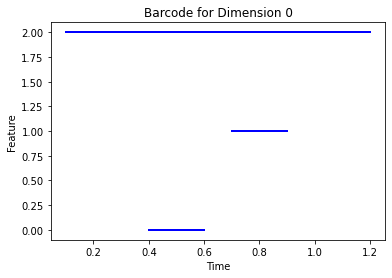

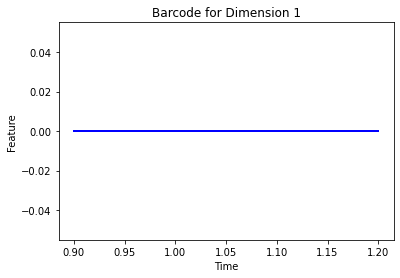

In [2]:
import matplotlib.pyplot as plt

dimension_0_barcodes = [(0.4, 0.6), (0.7, 0.9), (0.1, float('inf'))]
dimension_1_barcodes = [(0.9, float('inf'))]

def plot_barcodes(barcodes, dimension):
    plt.figure(figsize=(6, 4))
    for idx, (birth, death) in enumerate(barcodes):
        death = death if death != float('inf') else 1.2
        plt.plot([birth, death], [idx, idx], 'b-', lw=2)
    plt.title(f"Barcode for Dimension {dimension}")
    plt.xlabel("Time")
    plt.ylabel("Feature")
    plt.show()

plot_barcodes(dimension_0_barcodes, 0)
plot_barcodes(dimension_1_barcodes, 1)